<a href="https://colab.research.google.com/github/MarcelKurniawan/Statistics-for-data-science-python/blob/main/statistics_for_data_science_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Case Scenario**

**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

Details regarding the project will be broken down in the next reading sections.



```
Attribute Information:

·      CRIM - per capita crime rate by town
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
·      INDUS - proportion of non-retail business acres per town.
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
·      NOX - nitric oxides concentration (parts per 10 million)
·      RM - average number of rooms per dwelling
·      AGE - proportion of owner-occupied units built prior to 1940
·      DIS - weighted distances to five Boston employment centres
·      RAD - index of accessibility to radial highways
·      TAX - full-value property-tax rate per $10,000
·      PTRATIO - pupil-teacher ratio by town
·      LSTAT - % lower status of the population
·      MEDV - Median value of owner-occupied homes in $1000's
```



## **Import Libraries and Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

In [ ]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [ ]:
duplicated_df = df.duplicated().sum()
print("Duplicated value in dataframe:", duplicated_df)

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
miss_df = df.isnull().sum()
print(miss_df)

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


## **Generate Descriptive Statistics and Plot**

In [ ]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


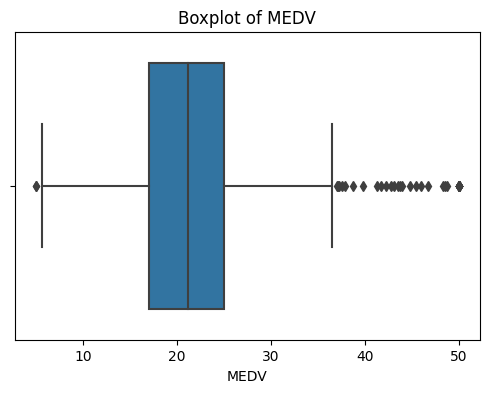

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df.MEDV)
plt.title('Boxplot of MEDV')
plt.xlabel('MEDV')
plt.show()

**Note:** Outliers after Q3

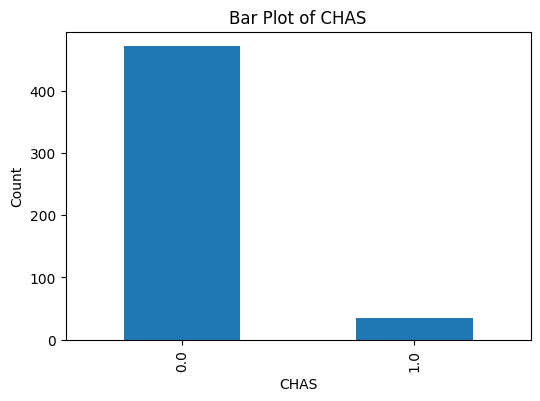

In [ ]:
plt.figure(figsize=(6, 4))
df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of CHAS')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()

**Note**: Most of the neighborhoods or areas do not have boundaries that touch the Charles River.

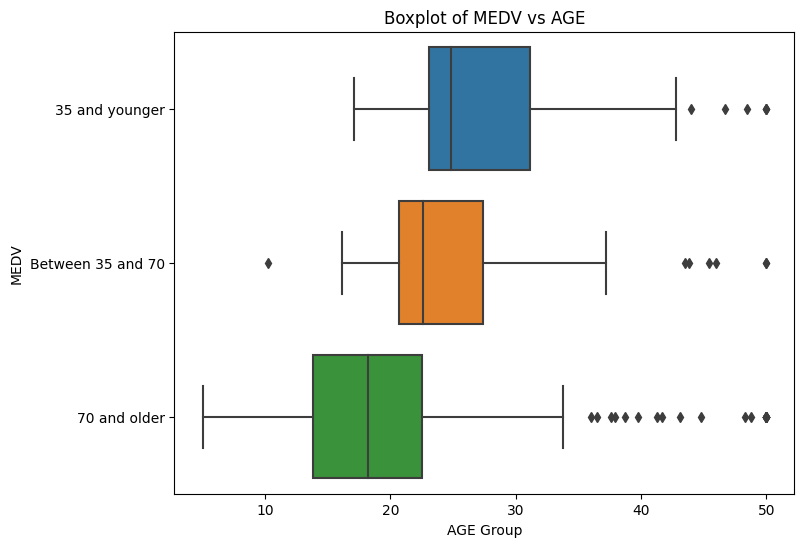

In [ ]:
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, df['AGE'].max()], labels=['35 and younger', 'Between 35 and 70', '70 and older'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df.MEDV, y=df.AGE_Group, data=df)
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

**Note:** The median house prices are highest among individuals aged 35 and below, while those above 70 are increasingly opting for more affordable housing options.

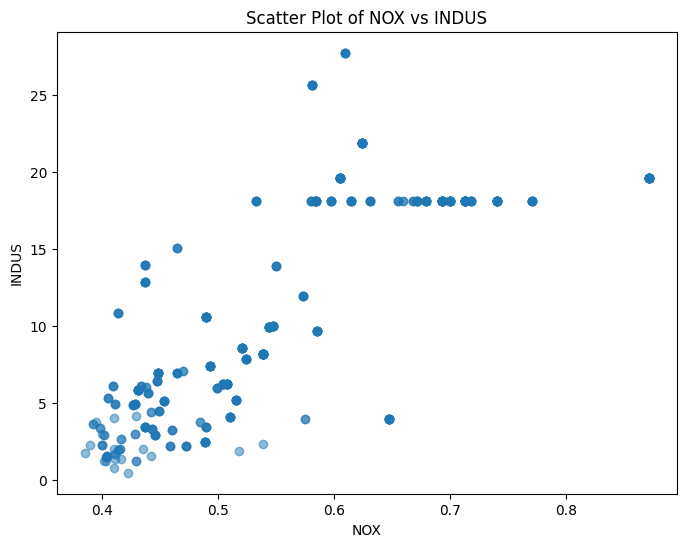

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['NOX'], df['INDUS'], alpha=0.5)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.show()

**Note:** There appears to be a linear correlation or connection observed up to the point where NOX (nitric oxide concentration) reaches 0.6.








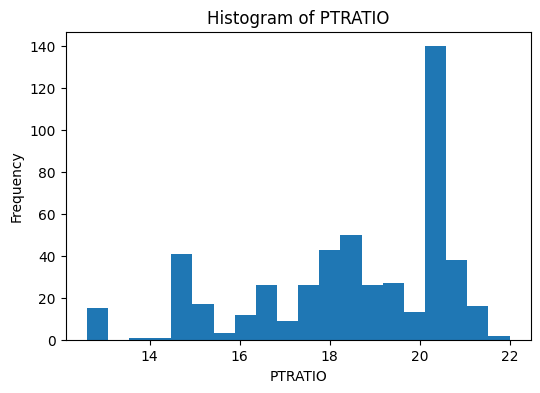

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['PTRATIO'], bins=20)
plt.title('Histogram of PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

**Note**: The pupil-to-teacher ratio reaches its peak within the range of 20 to 21.

# **Task 5: Use the appropriate tests to answer the questions provided.**

#### **Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

**Stated Hyphotesis:**

**Null Hypothesis:** The average MEDV (median values of owner-occupied homes) are equal.

**Alternative Hypothesis:** The average MEDV are different.

In [ ]:
CHAS_0 = df[df["CHAS"] == 0]["MEDV"]
CHAS_1 = df[df["CHAS"] == 1]["MEDV"]

In [ ]:
scipy.stats.ttest_ind(CHAS_0,CHAS_1,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Note**: Because the p-value exceeds the alpha value of 0.05, we failed reject the null hypothesis as there is no statistical significance observed.

#### **Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

**Stated Hyphotesis:**

**Null Hypothesis:** The three population means are equal (µ1 = µ2 = µ3).

**Alternative Hypothesis:**At least one of the means is different from the others.

In [ ]:
conditions = [
    (df["AGE"] <= 35),
    (df["AGE"] > 35) & (df["AGE"] < 70),
    (df["AGE"] >= 70)
]

choices = [
    '35 years and younger',
    'between 35 and 70 years',
    '70 years and older'
]

df['age_group'] = np.select(conditions, choices, default='Other')

In [ ]:
grouped_data = df.groupby('age_group')['MEDV'].apply(list).to_dict()

low = grouped_data.get('35 years and younger', [])
mid = grouped_data.get('between 35 and 70 years', [])
high = grouped_data.get('70 years and older', [])

In [ ]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


**Note:** As the p-value exceeds the alpha level of 0.05, we do not reject the null hypothesis due to the lack of statistical significance.








#### **Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Null hyphotesis: No observable correlation exists between NOX and INDUS.

Alternative hyphotesis: There is evidence indicating a correlation between NOX and INDUS.

In [ ]:
pearson,p_value = scipy.stats.pearsonr(df["NOX"],df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209151, P-value=7.913361061239527e-98


**Note:** Because the p-value (Significance (2-tailed)) is less than 0.05, we reject the Null hypothesis and infer that there is indeed a correlation between Nitric Oxide and non-retail business acres per town.








#### **What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

**Stated Hyphotesis:**

**Null Hypothesis:** There is no significant relationship between the weighted distances to five Boston employment centers and the median value.

**Alternative Hypothesis:** There is a significant relationship between the weighted distances to five Boston employment centers and the median value.

In [ ]:
y = df['MEDV']
x = df['DIS']
x = sm.add_constant(x)
reg = sm.OLS(y,x).fit()
pred = reg.predict(x)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        23:11:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for DIS being 1.0916 suggests that for each unit increase in the weighted distance to the five employment centers in Boston, there is an expected increase of 1.0916 in the median value of owner-occupied homes